## Estimaciones agricolas

In [1]:
from __future__ import unicode_literals

import pandas as pd
import numpy as np
import requests
import json
import matplotlib
import shutil
from matplotlib import pyplot as plt
from IPython.display import HTML

%matplotlib inline
matplotlib.style.use("ggplot")

In [2]:
 
# especificar separador, codificación, separador de miles y caracter decimal
df_cultivos = pd.read_csv("/mnt/Python/Estimaciones/estimaciones_agricolas.csv", 
                          sep=";", encoding="ISO-8859-1", decimal=",")

df_cultivos

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1.0,Ajo,1,1969/1970,3,3,10,3333
1,6,Buenos Aires,14,Adolfo Gonzales Chaves,1.0,Ajo,1,1969/1970,15,15,82,5467
2,6,Buenos Aires,21,Alberti,1.0,Ajo,1,1969/1970,5,5,7,1400
3,6,Buenos Aires,28,Almirante Brown,1.0,Ajo,1,1969/1970,2,2,8,4000
4,6,Buenos Aires,77,Arrecifes,1.0,Ajo,1,1969/1970,6,6,15,2500
...,...,...,...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,49,La Cocha,28.0,Trigo total,53,2022/2023,11880,10440,7308,700
153885,90,Tucuman,56,Leales,28.0,Trigo total,53,2022/2023,15300,14325,8595,600
153886,90,Tucuman,63,Lules,28.0,Trigo total,53,2022/2023,300,300,330,1100
153887,90,Tucuman,91,Simoca,28.0,Trigo total,53,2022/2023,200,200,200,1000


In [3]:
df_cultivos['cultivo'].unique()

array(['Ajo', 'Algodón', 'Alpiste', 'Arroz', 'Avena', 'Banana',
       'Caña de azúcar', 'Cártamo', 'Cebada cervecera',
       'Cebada forrajera', 'Cebolla total', 'Centeno', 'Girasol', 'Limón',
       'Lino', 'Maíz', 'Mandarina', 'Maní', 'Mijo', 'Naranja',
       'Papa total', 'Pomelo', 'Poroto seco', 'Soja total', 'Sorgo', 'Té',
       'Trigo total', 'Tung', 'Yerba mate', 'Trigo candeal', 'Colza',
       'Jojoba', 'Soja 1ra', 'Soja 2da', 'Cebada total', 'Poroto total',
       'Arveja', 'Garbanzo', 'Lenteja', 'Poroto alubia', 'Poroto negro',
       'Poroto otros'], dtype=object)

In [4]:
df_cultivos['provincia'].unique()

array(['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba',
       'Entre Rios', 'Formosa', 'Jujuy', 'La Rioja', 'Mendoza',
       'Misiones', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan',
       'San Luis', 'Santa Fe', 'Santiago del Estero', 'Tucuman',
       'Corrientes', 'La Pampa', 'Santa Cruz', 'Tierra del Fuego'],
      dtype=object)

In [5]:
# Instalar los paquetes necesarios
!pip install comtradeapicall pandas



[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
import pandas as pd
import comtradeapicall

# Configura tu clave de suscripción y otros parámetros
subscription_key = 'f2ca35a280f9456c907350b972149f2c' # Reemplaza con tu clave de suscripción real
# Establece otros parámetros necesarios para tu llamada a la API


In [35]:
mydf = comtradeapicall.previewFinalData(typeCode='C', freqCode='A', clCode='HS', period='2015,2016,2017,2018,2019,2020,2021,2022',
                                        reporterCode='32', cmdCode='1201,1001', flowCode='X', partnerCode=None,
                                        partner2Code=None,
                                        customsCode=None, motCode=None, maxRecords=22500, format_output='JSON',
                                        aggregateBy=None, breakdownMode='classic', countOnly=None, includeDesc=True)


In [36]:
mydf.tail(5)

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
356,C,A,20220101,2022,52,2022,32,ARG,Argentina,X,...,31860000.0,False,0.0,False,NaN,1.999514e+07,1.999514e+07,0,False,True
357,C,A,20220101,2022,52,2022,32,ARG,Argentina,X,...,32204300.0,False,0.0,False,NaN,1.915796e+07,1.915796e+07,0,False,True
358,C,A,20220101,2022,52,2022,32,ARG,Argentina,X,...,180665.0,False,0.0,False,NaN,1.474998e+05,1.474998e+05,0,False,True
359,C,A,20220101,2022,52,2022,32,ARG,Argentina,X,...,129923790.0,False,0.0,False,NaN,1.077204e+08,1.077204e+08,0,False,True
360,C,A,20220101,2022,52,2022,32,ARG,Argentina,X,...,6579770.0,False,0.0,False,NaN,4.598921e+06,4.598921e+06,0,False,True


In [51]:
mydf.head(3).transpose()

,0,1,2
typeCode,C,C,C
freqCode,A,A,A
refPeriodId,20150101,20150101,20150101
refYear,2015,2015,2015
refMonth,52,52,52
period,2015,2015,2015
reporterCode,32,32,32
reporterISO,ARG,ARG,ARG
reporterDesc,Argentina,Argentina,Argentina
flowCode,X,X,X


In [41]:
# Nombres de columnas ajustados según tu DataFrame
adjusted_columns = [
    "flowDesc",  # Descripción del tipo de flujo de comercio (Exportación, Importación)
    "reporterDesc",  # Nombre del país que reporta
    "partnerDesc",  # Nombre del país que es contraparte
    "refYear",  # Año
    "cmdCode",  # Código de la mercancía
    "cmdDesc",  # Descripción de la mercancía
    "primaryValue",  # Valor del flujo comercial
    "qty",  # Cantidad física involucrada en el flujo comercial
    "qtyUnitAbbr" , # Unidad de la cantidad (abbr)
    "fobvalue"  ## precio FOB
]

# Seleccionar las columnas ajustadas y mostrar las primeras 5 filas
selected_data = mydf[adjusted_columns]
print(selected_data)

    flowDesc reporterDesc                       partnerDesc  refYear cmdCode  \
0     Export    Argentina                             World     2015    1001   
1     Export    Argentina                        Bangladesh     2015    1001   
2     Export    Argentina                           Belgium     2015    1001   
3     Export    Argentina  Bolivia (Plurinational State of)     2015    1001   
4     Export    Argentina                            Brazil     2015    1001   
..       ...          ...                               ...      ...     ...   
356   Export    Argentina                       Philippines     2022    1201   
357   Export    Argentina                          Viet Nam     2022    1201   
358   Export    Argentina                      South Africa     2022    1201   
359   Export    Argentina                               USA     2022    1201   
360   Export    Argentina                           Uruguay     2022    1201   

                               cmdDesc 

In [49]:
# calcular precio FOB internacional por tonelada
selected_data["precio_ton"] = (selected_data.primaryValue / selected_data.qty)* 1000
print(selected_data)
#df_precios = selected_data.pivot(index='refYear', columns='cmdDesc', values='precio_ton')
#df_precios.columns = [ 'Soja','Trigo']

    flowDesc reporterDesc                       partnerDesc  refYear cmdCode  \
0     Export    Argentina                             World     2015    1001   
1     Export    Argentina                        Bangladesh     2015    1001   
2     Export    Argentina                           Belgium     2015    1001   
3     Export    Argentina  Bolivia (Plurinational State of)     2015    1001   
4     Export    Argentina                            Brazil     2015    1001   
..       ...          ...                               ...      ...     ...   
356   Export    Argentina                       Philippines     2022    1201   
357   Export    Argentina                          Viet Nam     2022    1201   
358   Export    Argentina                      South Africa     2022    1201   
359   Export    Argentina                               USA     2022    1201   
360   Export    Argentina                           Uruguay     2022    1201   

                               cmdDesc 

/tmp/ipykernel_752/2734209809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["precio_ton"] = (selected_data.primaryValue / selected_data.qty)* 1000


In [58]:
selected_data.drop_duplicates(subset=['refYear', 'cmdDesc'], keep='first', inplace=True)
df_precios = selected_data.pivot(index='refYear', columns='cmdDesc', values='precio_ton')
df_precios.columns = ['Soja', 'Trigo']
df_precios

/opt/conda/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Soja,Trigo
refYear,,
2015,366.511792,239.572144
2016,361.485435,181.931414
2017,369.191834,180.306235
2018,391.705099,206.333566
2019,338.654081,217.739025
2020,343.755235,199.029850
2021,521.039828,258.725771
2022,593.157084,309.224885


<AxesSubplot:title={'center':'Precios de Soja (Exportación - USD/ton)'}, xlabel='refYear'>

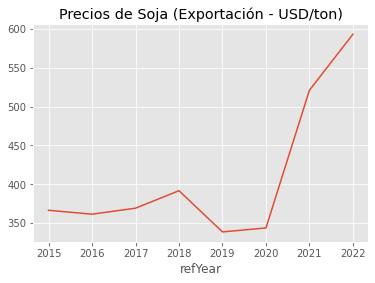

In [60]:
df_precios.Soja[df_precios.Soja.index >= 1980].plot.line(title="Precios de Soja (Exportación - USD/ton)")

<AxesSubplot:title={'center':'Precios de Trigo (Exportación - USD/ton)'}, xlabel='refYear'>

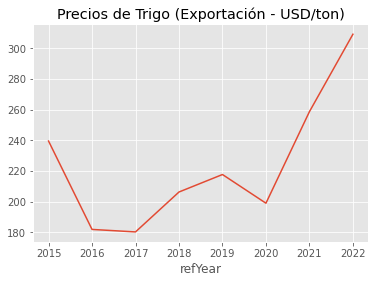

In [61]:
df_precios.Trigo[df_precios.Trigo.index >= 1980].plot.line(title="Precios de Trigo (Exportación - USD/ton)")

In [62]:
# Funciones auxiliares

def pivotear_tabla(df, grupo, campo, columnas):
    df_out = df.groupby(grupo)[campo].sum() # Agrupar y sumar
    df_out = df_out.reset_index(level=1) # Volver el cultivo a una columna normal (sacarlo del indice)
    df_out = df_out.pivot(columns=columnas, values=campo) # Pivotear para convertir en un tabla
    df_out.index = df_out.index.str.slice(0,4).astype(int) # Extraer 4 caracteres del indice y convertir a int
    df_out = df_out[['Soja total', 'Trigo total']]
    return df_out

Text(0, 0.5, 'Precio por tonelada [USD/ton]')

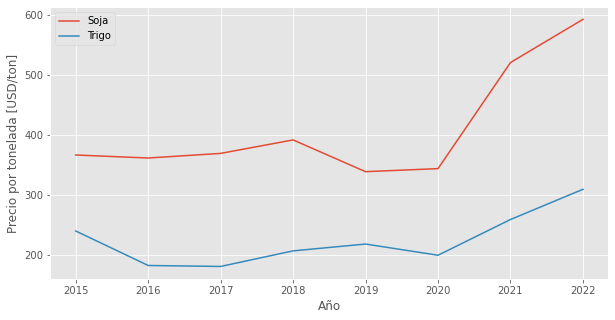

In [63]:
df_precios[df_precios.index > 1980].plot(figsize=(10,5))
plt.xlabel(u"Año")
plt.ylabel(u"Precio por tonelada [USD/ton]")

In [64]:
df_cultivos['cultivo'].unique()



array(['Ajo', 'Algodón', 'Alpiste', 'Arroz', 'Avena', 'Banana',
       'Caña de azúcar', 'Cártamo', 'Cebada cervecera',
       'Cebada forrajera', 'Cebolla total', 'Centeno', 'Girasol', 'Limón',
       'Lino', 'Maíz', 'Mandarina', 'Maní', 'Mijo', 'Naranja',
       'Papa total', 'Pomelo', 'Poroto seco', 'Soja total', 'Sorgo', 'Té',
       'Trigo total', 'Tung', 'Yerba mate', 'Trigo candeal', 'Colza',
       'Jojoba', 'Soja 1ra', 'Soja 2da', 'Cebada total', 'Poroto total',
       'Arveja', 'Garbanzo', 'Lenteja', 'Poroto alubia', 'Poroto negro',
       'Poroto otros'], dtype=object)

Text(0, 0.5, 'Superficie Sembrada [hA]')

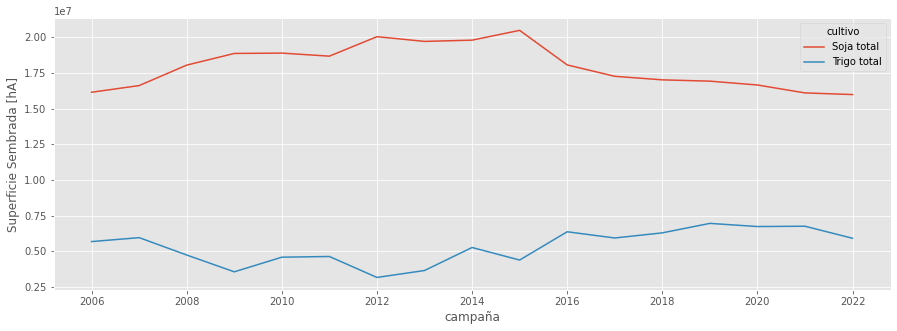

In [86]:
# Agrupar por año

df_sup = pivotear_tabla(df_cultivos, grupo=['campaña', 'cultivo'], 
                        campo='sup_sembrada',
                        columnas='cultivo')

df_sup

df_sup[df_sup.index > 2005].plot(figsize=(15,5))
plt.ylabel(u"Superficie Sembrada [hA]")

In [79]:
# Convertir la columna 'rendimiento' a numérica, los no numéricos se convertirán en NaN
df_cultivos['rendimiento'] = pd.to_numeric(df_cultivos['rendimiento'], errors='coerce')

# Eliminar filas con NaN en la columna 'rendimiento'
df_cultivos = df_cultivos.dropna(subset=['rendimiento'])

# Luego, procede con el pivoteo de la tabla como lo hiciste anteriormente
#df_ren = pivotear_tabla(df_cultivos, grupo=['campaña', 'cultivo'], campo='rendimiento', columnas='cultivo')

#df_ren[df_ren.index >= 2000]#.plot(figsize=(10, 5))
# Finalmente, realiza la visualización
#df_ren[df_ren.index > 2005].plot(figsize=(10,5))
#plt.ylabel("Superficie Sembrada [hA]")


,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campaña,campaña,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1.0,Ajo,1,1969/1970,3,3,10,3333.0
1,6,Buenos Aires,14,Adolfo Gonzales Chaves,1.0,Ajo,1,1969/1970,15,15,82,5467.0
2,6,Buenos Aires,21,Alberti,1.0,Ajo,1,1969/1970,5,5,7,1400.0
3,6,Buenos Aires,28,Almirante Brown,1.0,Ajo,1,1969/1970,2,2,8,4000.0
4,6,Buenos Aires,77,Arrecifes,1.0,Ajo,1,1969/1970,6,6,15,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,49,La Cocha,28.0,Trigo total,53,2022/2023,11880,10440,7308,700.0
153885,90,Tucuman,56,Leales,28.0,Trigo total,53,2022/2023,15300,14325,8595,600.0
153886,90,Tucuman,63,Lules,28.0,Trigo total,53,2022/2023,300,300,330,1100.0
153887,90,Tucuman,91,Simoca,28.0,Trigo total,53,2022/2023,200,200,200,1000.0


In [97]:
# Step 1: Filter and clean the data
selected_crops = ['Soja total', 'Trigo total']
df_filtered = df_cultivos[df_cultivos['cultivo'].isin(selected_crops) & (df_cultivos['campaña'] >= "2000/2001")]
df_filtered['rendimiento'] = pd.to_numeric(df_filtered['rendimiento'], errors='coerce')

# Step 2: Calculate national average yield by campaign
national_average_yield = df_filtered.groupby(['campaña', 'cultivo'])['rendimiento'].mean().reset_index()

# Step 3: Calculate average yield for the specified provinces
provinces_of_interest = ['Buenos Aires', 'Santa Fe', 'Córdoba', 'La Pampa']
province_average_yield = df_filtered[df_filtered['provincia'].isin(provinces_of_interest)].groupby([ 'cultivo', 'provincia'])['rendimiento'].mean().reset_index()

# Print the national average yield
print("National Average Yield:")
print(national_average_yield)

# Print the average yield for the specified provinces
print("\nAverage Yield for Specified Provinces:")
print(province_average_yield)


National Average Yield:
      campaña      cultivo  rendimiento
0   2000/2001   Soja total  2203.363636
1   2000/2001  Trigo total  2262.285000
2   2001/2002   Soja total  2233.435556
3   2001/2002  Trigo total  1958.974490
4   2002/2003   Soja total  2391.651376
5   2002/2003  Trigo total  1912.515000
6   2003/2004   Soja total  2012.549180
7   2003/2004  Trigo total  2351.824645
8   2004/2005   Soja total  2334.762332
9   2004/2005  Trigo total  2585.584158
10  2005/2006   Soja total  2427.021277
11  2005/2006  Trigo total  2492.307359
12  2006/2007   Soja total  2597.342742
13  2006/2007  Trigo total  2530.769565
14  2007/2008   Soja total  2373.174905
15  2007/2008  Trigo total  2563.974684
16  2008/2009   Soja total  1465.316794
17  2008/2009  Trigo total  1906.918552
18  2009/2010   Soja total  2596.523985
19  2009/2010  Trigo total  2633.257009
20  2010/2011   Soja total  2398.160584
21  2010/2011  Trigo total  3247.353712
22  2011/2012   Soja total  1978.019157
23  2011/2012  T

/tmp/ipykernel_752/3910823812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rendimiento'] = pd.to_numeric(df_filtered['rendimiento'], errors='coerce')


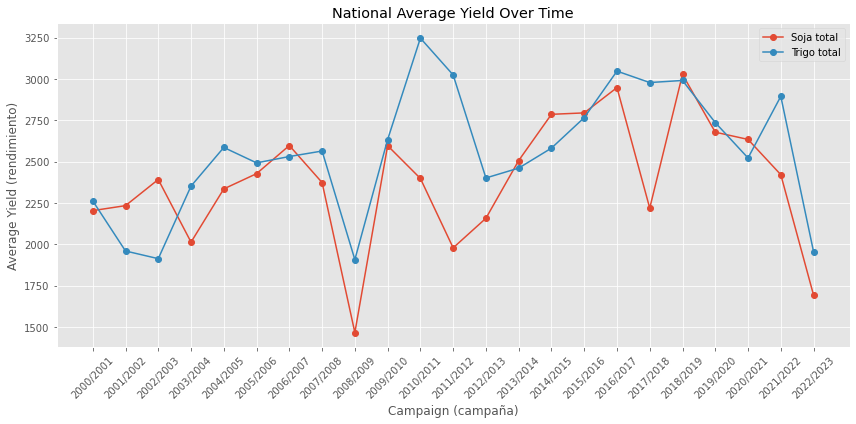

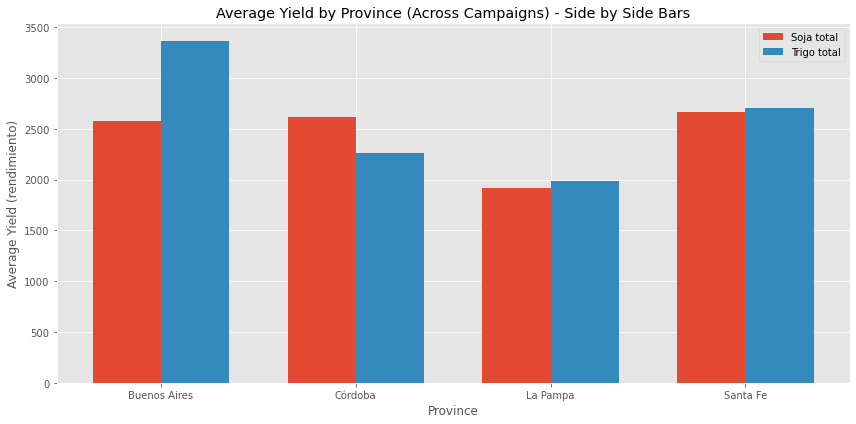

In [100]:


import pandas as pd
import matplotlib.pyplot as plt


# Create DataFrames from the sample data
data1 = pd.DataFrame(national_average_yield)
data2 = pd.DataFrame(province_average_yield)

# Step 1: Plot the time series for the national average yield
plt.figure(figsize=(12, 6))
for crop in selected_crops:
    data = data1[data1['cultivo'] == crop]
    plt.plot(data['campaña'], data['rendimiento'], marker='o', linestyle='-', label=crop)

plt.title('National Average Yield Over Time')
plt.xlabel('Campaign (campaña)')
plt.ylabel('Average Yield (rendimiento)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Step 2: Create separate bar charts for provincial average yields by crop
# Get unique crops and provinces
unique_crops = data2['cultivo'].unique()
unique_provinces = data2['provincia'].unique()

# Set the width of each bar
bar_width = 0.35

# Create an array of x positions for bars
x = np.arange(len(unique_provinces))

# Create a bar chart for provincial average yields by crop
plt.figure(figsize=(12, 6))

for i, crop in enumerate(unique_crops):
    data = province_average_yield[province_average_yield['cultivo'] == crop]
    plt.bar(x + i * bar_width, data['rendimiento'], width=bar_width, label=crop)

plt.title('Average Yield by Province (Across Campaigns) - Side by Side Bars')
plt.xlabel('Province')
plt.ylabel('Average Yield (rendimiento)')
plt.grid(True)
plt.xticks(x + bar_width * (len(unique_crops) - 1) / 2, unique_provinces)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## Encontrar los departamenos con mayor rinde historico para cada cultivo

In [102]:
# Filtra los datos para incluir solo los cultivos de trigo y soja
cultivos_seleccionados = ['Trigo total', 'Soja total']
df_seleccionado = df_cultivos[df_cultivos['cultivo'].isin(cultivos_seleccionados) & (df_cultivos['campaña'] >= "2000/2001")]

# Agrupa los datos por departamento y cultivo y calcula el rendimiento promedio histórico
rendimiento_promedio = df_seleccionado.groupby(['departamento', 'cultivo'])['rendimiento'].mean().reset_index()

# Filtra solo los datos de cultivo de trigo
rendimiento_trigo = rendimiento_promedio[rendimiento_promedio['cultivo'] == 'Trigo total']

# Ordena los departamentos por rendimiento promedio histórico de trigo en orden descendente
top_10_departamentos_trigo = rendimiento_trigo.sort_values(by='rendimiento', ascending=False).head(10)

# Filtra solo los datos de cultivo de soja
rendimiento_soja = rendimiento_promedio[rendimiento_promedio['cultivo'] == 'Soja total']

# Ordena los departamentos por rendimiento promedio histórico de soja en orden descendente
top_10_departamentos_soja = rendimiento_soja.sort_values(by='rendimiento', ascending=False).head(10)

# Imprime los 10 departamentos con mayor rendimiento promedio histórico de trigo y soja
print("Top 10 Departamentos con Mayor Rendimiento Promedio Histórico de Trigo:")
print(top_10_departamentos_trigo)

print("\nTop 10 Departamentos con Mayor Rendimiento Promedio Histórico de Soja:")
print(top_10_departamentos_soja)

Top 10 Departamentos con Mayor Rendimiento Promedio Histórico de Trigo:
               departamento      cultivo  rendimiento
179  General Juan Madariaga  Trigo total  4435.086957
198      General Pueyrredon  Trigo total  4216.869565
164        General Alvarado  Trigo total  4209.565217
37                 Balcarce  Trigo total  4112.391304
493                  Tandil  Trigo total  4089.739130
408                   Rojas  Trigo total  4037.347826
331                Necochea  Trigo total  3995.565217
289                 Loberia  Trigo total  3920.782609
427                   Salto  Trigo total  3920.434783
304            Mar Chiquita  Trigo total  3895.565217

Top 10 Departamentos con Mayor Rendimiento Promedio Histórico de Soja:
              departamento     cultivo  rendimiento
356              Pergamino  Soja total  3481.260870
407                  Rojas  Soja total  3456.652174
426                  Salto  Soja total  3442.782609
307          Marcos Juarez  Soja total  3440.652174
16

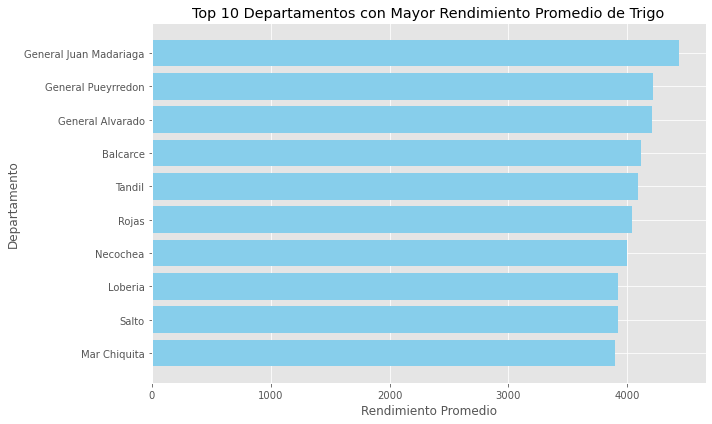

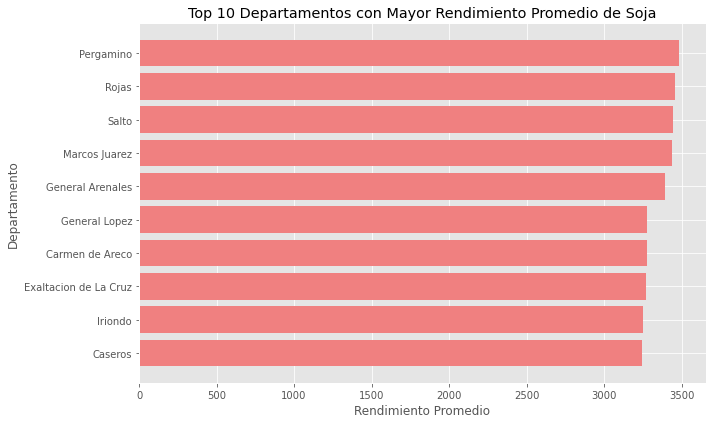

In [103]:
# Gráfico de barras para los 10 departamentos con mayor rendimiento promedio histórico de trigo
plt.figure(figsize=(10, 6))
plt.barh(top_10_departamentos_trigo['departamento'], top_10_departamentos_trigo['rendimiento'], color='skyblue')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar el mayor rendimiento en la parte superior
plt.title('Top 10 Departamentos con Mayor Rendimiento Promedio de Trigo')
plt.xlabel('Rendimiento Promedio')
plt.ylabel('Departamento')
plt.tight_layout()

# Gráfico de barras para los 10 departamentos con mayor rendimiento promedio histórico de soja
plt.figure(figsize=(10, 6))
plt.barh(top_10_departamentos_soja['departamento'], top_10_departamentos_soja['rendimiento'], color='lightcoral')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar el mayor rendimiento en la parte superior
plt.title('Top 10 Departamentos con Mayor Rendimiento Promedio de Soja')
plt.xlabel('Rendimiento Promedio')
plt.ylabel('Departamento')
plt.tight_layout()

# Mostrar los gráficos
plt.show()